**Convolutional Neural Network**

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [91]:
# load the data
(xtrain, ytrain), (xval, yval) = mnist.load_data()

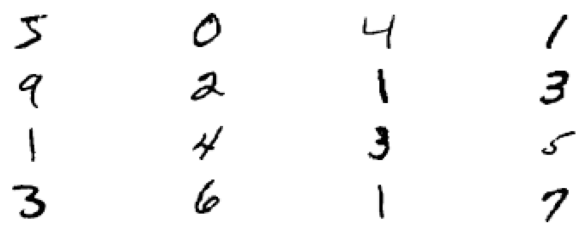

In [83]:
# inspect the data
plt.figure(figsize=(12,4))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [92]:
# reshape the data
xtrain = xtrain.reshape((60000, 28, 28, 1))
xval = xval.reshape((10000, 28, 28, 1))

# normalize the data
xtrain = xtrain/255
xval = xval/255

# convert output to categorical
ytrain = to_categorical(ytrain)
ytrain.shape

(60000, 10)

In [8]:
model = Sequential([

    Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(28, 28, 1)),
    Activation('relu'),
    # MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=32, kernel_size=(3,3), padding='same'),
    # BatchNormalization()
    Activation('relu'),

    # Conv2D(filters=64, kernel_size=(3,3), padding='same'),
    # BatchNormalization()
    # Activation('relu'),
    
    MaxPool2D(pool_size=(2, 2)),
    
    Dropout(0.33),
  
    Flatten(),
    
    # Dense(100), 
    # Activation('relu'),
    
    Dense(10), 
    Activation('softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [10]:
# compile the model
# 'categorical_crossentropy' - since we have 10 categories
# 'accuracy' - since this is a classification problem
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer="Adam"
)

In [11]:
# fit the model
# number of epochs - iterations through the dataset to train
history = model.fit(x=xtrain, y=ytrain, batch_size=500, epochs=10, validation_data=(xval, to_categorical(yval)))

Epoch 1/10
120/120 [==============================] - 74s 613ms/step - loss: 0.5689 - accuracy: 0.8431 - val_loss: 0.2301 - val_accuracy: 0.9353
Epoch 2/10
120/120 [==============================] - 74s 613ms/step - loss: 0.1817 - accuracy: 0.9471 - val_loss: 0.1081 - val_accuracy: 0.9681
Epoch 3/10
120/120 [==============================] - 74s 614ms/step - loss: 0.1088 - accuracy: 0.9679 - val_loss: 0.0735 - val_accuracy: 0.9767
Epoch 4/10
120/120 [==============================] - 73s 611ms/step - loss: 0.0843 - accuracy: 0.9752 - val_loss: 0.0599 - val_accuracy: 0.9811
Epoch 5/10
120/120 [==============================] - 74s 613ms/step - loss: 0.0713 - accuracy: 0.9790 - val_loss: 0.0552 - val_accuracy: 0.9827
Epoch 6/10
120/120 [==============================] - 74s 614ms/step - loss: 0.0623 - accuracy: 0.9818 - val_loss: 0.0519 - val_accuracy: 0.9830
Epoch 7/10
120/120 [==============================] - 74s 616ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.0478 - val_ac

In [12]:
# score = model.evaluate(xtrain, ytrain, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [13]:
score = model.evaluate(xval, to_categorical(yval), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03919288516044617
Test accuracy: 0.9866999983787537


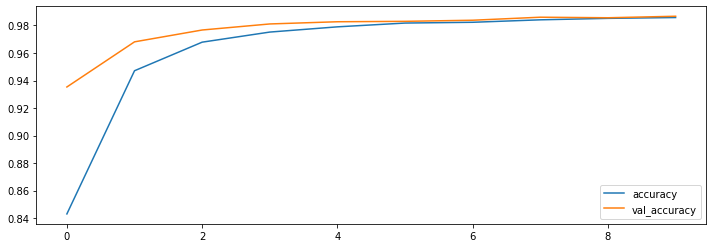

In [15]:
# plot the accuracy
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

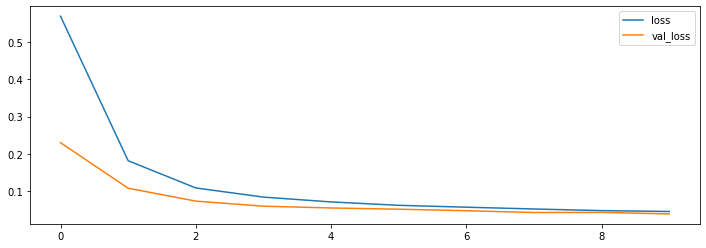

In [16]:
# plot the accuracy
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [17]:
# save model:
# model to JSON
with open("model.json", "w") as json_file:
    json_file.write(model.to_json())

# weights to HDF5
model.save("model.h5")

In [18]:
# Predict
predictions = model.predict(xval[:37])
# the softmax output is 10 probabilities, np.argmax() to get actual digits (Returns the indices of the maximum values along an axis)
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(yval[:37])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7]


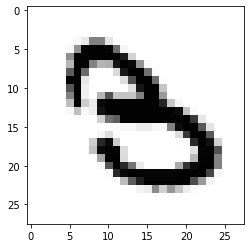

In [19]:
img=xval[18]
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

In [ ]:
ypred = model.predict_classes(xval)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yval, ypred)

array([[ 976,    0,    0,    0,    0,    1,    1,    1,    1,    0],
       [   0, 1127,    2,    2,    0,    0,    2,    1,    1,    0],
       [   2,    1, 1018,    0,    1,    0,    0,    7,    3,    0],
       [   0,    0,    2, 1002,    0,    1,    0,    3,    2,    0],
       [   1,    0,    1,    0,  973,    0,    0,    0,    2,    5],
       [   2,    0,    0,    6,    0,  883,    1,    0,    0,    0],
       [   6,    2,    0,    0,    2,    3,  939,    0,    6,    0],
       [   0,    2,   10,    2,    0,    1,    0, 1012,    1,    0],
       [   5,    0,    3,    1,    1,    2,    0,    3,  954,    5],
       [   3,    3,    0,    1,    5,    3,    0,    9,    2,  983]])

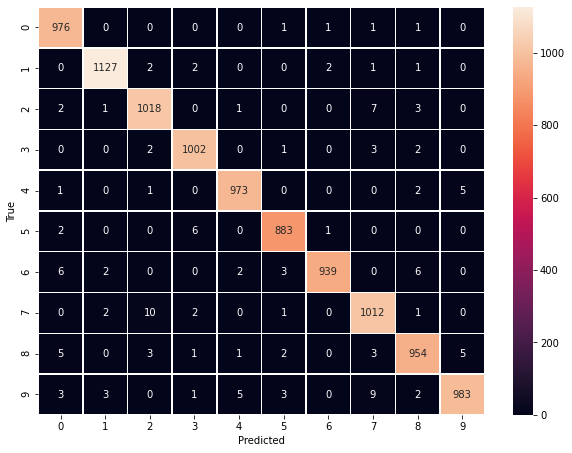

In [22]:
plt.figure(figsize=[10.0, 7.5])
sns.heatmap(confusion_matrix(yval, ypred), annot=True, fmt="d", linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Image augmentation**

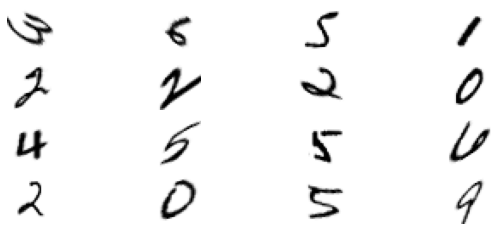

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(shear_range=50)

plt.figure(figsize=(10,4))

for x, y in gen.flow(xtrain, ytrain, batch_size=16):
	for i in range(0, 16):
		plt.subplot(4, 4, i+1)
		plt.imshow(x[i].reshape(28, 28), cmap=plt.cm.Greys)
		plt.axis('off')
	plt.show()
	break

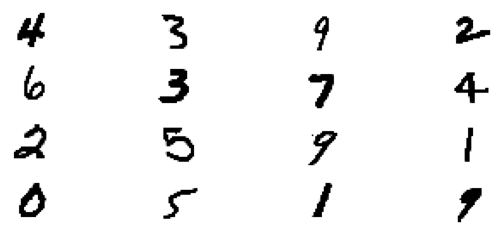

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(brightness_range=(10.0,20.0))

plt.figure(figsize=(10,4))

for x, y in gen.flow(xtrain, ytrain, batch_size=16):
	for i in range(0, 16):
		plt.subplot(4, 4, i+1)
		plt.imshow(x[i].reshape(28, 28), cmap=plt.cm.Greys)
		plt.axis('off')
	plt.show()
	break

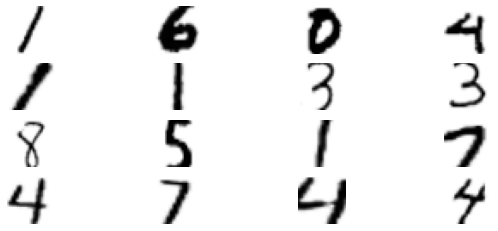

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(zoom_range=(0.5,0.9))

plt.figure(figsize=(10,4))

for x, y in gen.flow(xtrain, ytrain, batch_size=16):
	for i in range(0, 16):
		plt.subplot(4, 4, i+1)
		plt.imshow(x[i].reshape(28, 28), cmap=plt.cm.Greys)
		plt.axis('off')
	plt.show()
	break

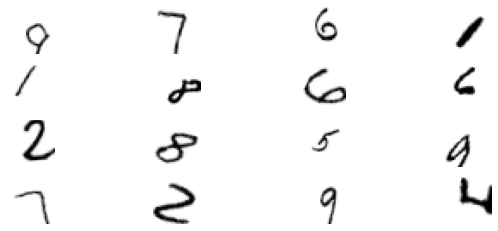

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=30, width_shift_range = 0.2, height_shift_range=0.2, shear_range=0.5, zoom_range=(0.6-0.8))

plt.figure(figsize=(10,4))
for x, y in gen.flow(xtrain, ytrain, batch_size=16):
	for i in range(0, 16):
		plt.subplot(4, 4, i+1)
		plt.imshow(x[i].reshape(28, 28), cmap=plt.cm.Greys)
		plt.axis('off')
	plt.show()
	break

In [106]:
xtrain = gen.flow(xtrain, ytrain, batch_size=500)

In [107]:
model.fit_generator(xtrain, epochs=10, steps_per_epoch =60000//500, validation_data=(xval, to_categorical(yval)))

Epoch 1/10
120/120 [==============================] - 85s 707ms/step - loss: 0.3665 - accuracy: 0.8932 - val_loss: 0.1523 - val_accuracy: 0.9596
Epoch 2/10
120/120 [==============================] - 84s 703ms/step - loss: 0.3618 - accuracy: 0.8940 - val_loss: 0.1407 - val_accuracy: 0.9614
Epoch 3/10
120/120 [==============================] - 85s 708ms/step - loss: 0.3495 - accuracy: 0.8977 - val_loss: 0.1566 - val_accuracy: 0.9564
Epoch 4/10
120/120 [==============================] - 88s 737ms/step - loss: 0.3342 - accuracy: 0.9006 - val_loss: 0.1255 - val_accuracy: 0.9670
Epoch 5/10
120/120 [==============================] - 85s 707ms/step - loss: 0.3288 - accuracy: 0.9040 - val_loss: 0.1456 - val_accuracy: 0.9606
Epoch 6/10
120/120 [==============================] - 85s 705ms/step - loss: 0.3178 - accuracy: 0.9061 - val_loss: 0.1334 - val_accuracy: 0.9611
Epoch 7/10
120/120 [==============================] - 85s 709ms/step - loss: 0.3083 - accuracy: 0.9087 - val_loss: 0.1150 - val_ac

In [108]:
score = model.evaluate(xval, to_categorical(yval), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11251991242170334
Test accuracy: 0.97079998254776


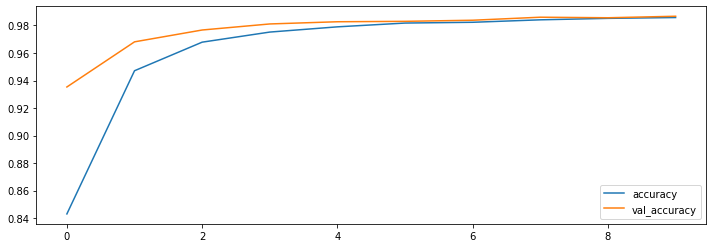

In [109]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

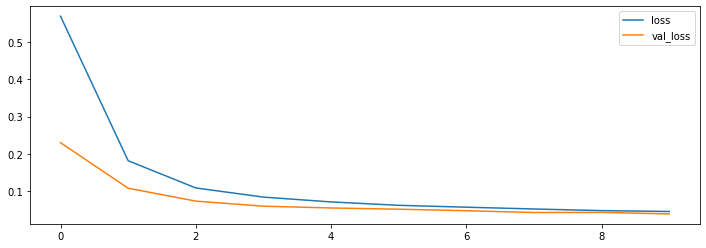

In [37]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()